In [1]:
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import rasterio as rio
from rasterio.plot import show

## Access Cloud Optimized Geotiffs with AWS

In [2]:
fpath = 'http://landsat-pds.s3.amazonaws.com/c1/L8/003/065/LC08_L1TP_003065_20190925_20191017_01_T1/LC08_L1TP_003065_20190925_20191017_01_T1_B4.TIF'

def rasterio_open(f):
    return rio.open(f)

src_image = rasterio_open(fpath)
print(src_image.profile)

{'driver': 'GTiff', 'dtype': 'uint16', 'nodata': None, 'width': 7601, 'height': 7741, 'count': 1, 'crs': CRS.from_epsg(32619), 'transform': Affine(30.0, 0.0, 363285.0,
       0.0, -30.0, -683685.0), 'blockxsize': 512, 'blockysize': 512, 'tiled': True, 'compress': 'deflate', 'interleave': 'band'}


In [3]:
overview = src_image.overviews(1)[-1]
overview

81

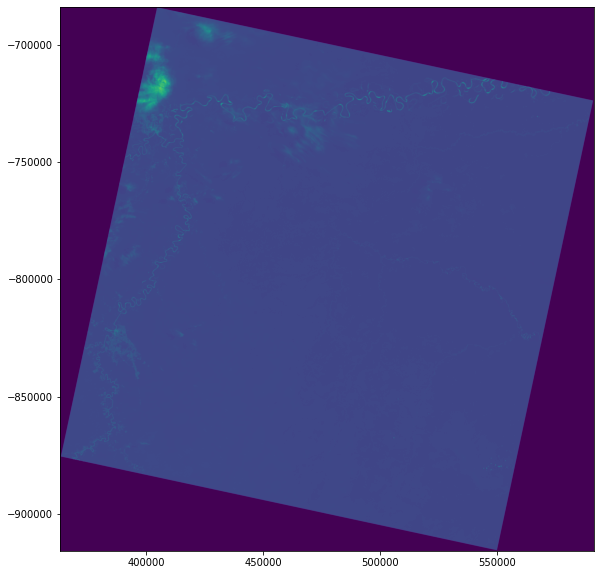

In [4]:
fig, ax = plt.subplots(1, figsize=(12, 10))
show(src_image, ax=ax)
plt.show()

In [5]:
src_image_array = src_image.read(1)
src_image_array = src_image_array.astype("f4")
src_image_array

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [6]:
src_image_array[src_image_array==0] = np.nan

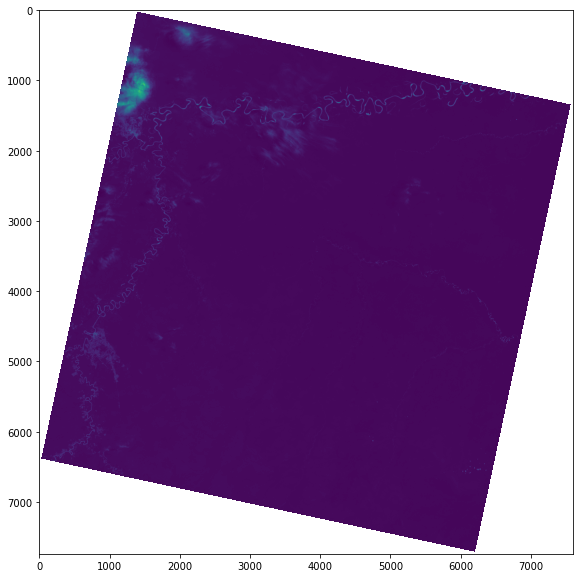

In [7]:
fig, ax = plt.subplots(1, figsize=(12, 10))
show(src_image_array, ax=ax)
plt.show()

In [8]:
src_image.profile

{'driver': 'GTiff', 'dtype': 'uint16', 'nodata': None, 'width': 7601, 'height': 7741, 'count': 1, 'crs': CRS.from_epsg(32619), 'transform': Affine(30.0, 0.0, 363285.0,
       0.0, -30.0, -683685.0), 'blockxsize': 512, 'blockysize': 512, 'tiled': True, 'compress': 'deflate', 'interleave': 'band'}

## Get subset of the image

Window(col_off, row_off, width, height)

In [13]:
window = rio.windows.Window(1200, 1200, 750, 850)

In [14]:
subset = src_image.read(1, window=window)

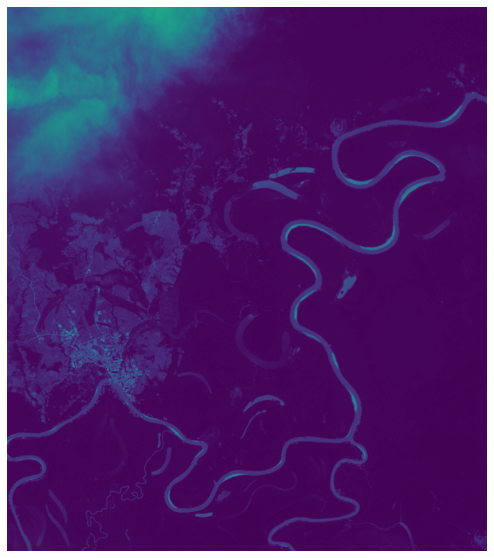

In [16]:
fig, ax = plt.subplots(1, figsize=(12, 10))
show(subset, ax=ax)
ax.set_axis_off()
plt.show()

## RGB

In [17]:
rpath = 'http://landsat-pds.s3.amazonaws.com/c1/L8/003/065/LC08_L1TP_003065_20190925_20191017_01_T1/LC08_L1TP_003065_20190925_20191017_01_T1_B4.TIF'
gpath = 'http://landsat-pds.s3.amazonaws.com/c1/L8/003/065/LC08_L1TP_003065_20190925_20191017_01_T1/LC08_L1TP_003065_20190925_20191017_01_T1_B3.TIF'
bpath = 'http://landsat-pds.s3.amazonaws.com/c1/L8/003/065/LC08_L1TP_003065_20190925_20191017_01_T1/LC08_L1TP_003065_20190925_20191017_01_T1_B2.TIF'

In [18]:
red = rio.open(rpath)
green = rio.open(gpath)
blue = rio.open(bpath)

In [19]:
red_array = red.read(1)
green_array = green.read(1)
blue_array = blue.read(1)

In [20]:
red.profile

{'driver': 'GTiff', 'dtype': 'uint16', 'nodata': None, 'width': 7601, 'height': 7741, 'count': 1, 'crs': CRS.from_epsg(32619), 'transform': Affine(30.0, 0.0, 363285.0,
       0.0, -30.0, -683685.0), 'blockxsize': 512, 'blockysize': 512, 'tiled': True, 'compress': 'deflate', 'interleave': 'band'}

In [21]:
red.width

7601

In [22]:
src_image.transform

Affine(30.0, 0.0, 363285.0,
       0.0, -30.0, -683685.0)

In [23]:
# Create an RGB image 
with rio.open('RGB.tiff','w',driver='Gtiff', width=red.width, height=red.height, 
              count=3,crs=red.crs,transform=red.transform, dtype=red.dtypes[0]) as rgb:
    rgb.write(blue.read(1),1) 
    rgb.write(green.read(1),2) 
    rgb.write(red.read(1),3) 
    rgb.close()

In [25]:
rgb = rio.open("RGB.tiff")

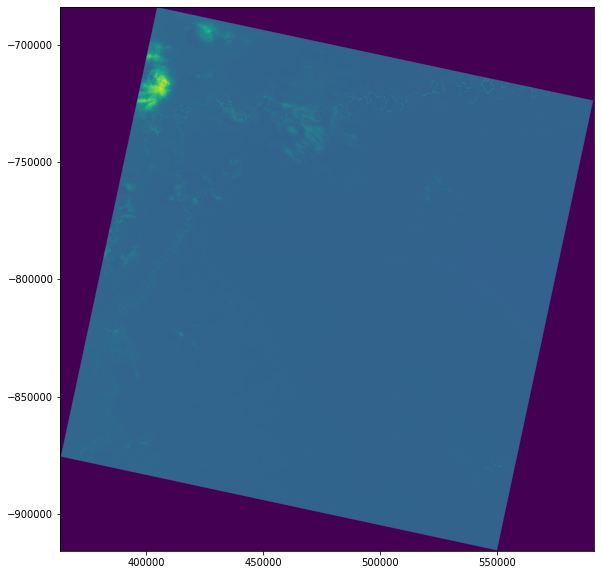

In [26]:
fig, ax = plt.subplots(1, figsize=(12, 10))
show(rgb, ax=ax, cmap="viridis")
plt.show()